In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
plt.style.use('seaborn-v0_8-poster')
pd.set_option('display.max_columns', 200)

In [6]:
df = pd.read_csv('D:\\IMPORTANT DATA\\AIU Computer Engineering\\CE Year 2\\Semester 2\\AIE121 Machine Learning\\Project\\parkinsons.csv')

***The dataset used was imported from the following source: https://archive.ics.uci.edu/dataset/174/parkinsons***

In [ ]:
df.shape
df.head()

In [ ]:
df.describe()

In [ ]:
df.columns

***Counting the number of features in the dataset.***

In [ ]:
len(df.columns)

***Checking the data types of all the features to know which ones to omit and which ones to keep***

In [ ]:
df.dtypes

***Checking for any missing values.***

In [ ]:
df.isna().sum()

***Checking for any duplicated data.***

In [ ]:
df.loc[df.duplicated()]

***Moving the 'status' column to the end as it represents the dependent feature in this dataset.***

In [ ]:
df1 = df.pop('status')
df['status'] = df1
df

***Dropping the 'name' column because it isn't of any use***

In [ ]:
df = df.drop('name', axis = 1)
df

In [ ]:
df.status.value_counts()

***We have 147 people diagnosed with Parkinson's ad 48 who aren't.***

### Checking for class imbalances 
- ***Majority Class***: 1 or people with Parkinson's 
- ***Minority Class***: 0 or people without Parkinson's

In [ ]:
class1 = 147 / 195
class2 = 48 / 195
print("Majority Class : ", class1)
print("Minority class: ", class2)
data = [class1, class2]
keys = ['Class 1', 'Class 2']
plt.pie(data, labels = keys, radius = 0.75, 
        autopct = '%1.2f%%', textprops = { 'fontsize' : 18})
plt.show()

***Since the degree of imbalance is mild, i.e 20-40%, there isn't a need for downsampling or upweighting.***

### Univariate Analysis

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 5))
sns.boxplot(x = 'spread1', data = df, ax = ax[0], orient = 'v')
sns.boxplot(x = 'spread2', data = df, ax = ax[1], orient = 'v')
sns.boxplot(x = 'PPE', data = df, ax = ax[2], orient = 'v')

***Plotting the distribution of the minimum, average, and maximum vocal fundamental frequencies respectively and displaying lines to mark the mean (red line) and median (blue dashed line) for each frequency.***

In [ ]:
sns.displot(df, x = "MDVP:Flo(Hz)", kde = True)
plt.axvline(x = df['MDVP:Flo(Hz)'].mean(),
            color='red')
plt.axvline(x = df['MDVP:Flo(Hz)'].median(),
            color='blue',
            ls='--', 
            lw=2.5)
sns.displot(df, x = "MDVP:Fo(Hz)", kde = True)
plt.axvline(x = df['MDVP:Fo(Hz)'].mean(),
            color='red')
plt.axvline(x = df['MDVP:Fo(Hz)'].median(),
            color='blue',
            ls='--', 
            lw=2.5)
sns.displot(df, x = "MDVP:Fhi(Hz)", kde = True)
plt.axvline(x = df['MDVP:Fhi(Hz)'].mean(),
            color='red')
plt.axvline(x = df['MDVP:Fhi(Hz)'].median(),
             color='blue',
             ls="--",
             lw=2.5)

***The measures of the minimum, average, and maximum vocal fundamental frequencies are shown above*** \
Observations:
- The distribution of the min vocal fundamental frequency is positively skewed with most values being in the 65Hz - 125Hz range.
- The avg vocal fundamental frequency is quite similar to a normal distribution while most of its values range from ~110Hz - ~130Hz.
- The max vocal frequency is almost normally distributed with some outliers on its right tail.

In [ ]:
sns.displot(df, x = "NHR", kde = True)
sns.displot(df, x = "HNR", kde = True)

In [ ]:
sns.displot(df, x = "MDVP:Shimmer(dB)", kde = True) 
sns.displot(df, x = "MDVP:Shimmer", kde = True) 
sns.displot(df, x = "Shimmer:APQ3", kde = True) 
sns.displot(df, x = "Shimmer:APQ5", kde = True) 
sns.displot(df, x = "MDVP:APQ", kde = True) 
sns.displot(df, x = "Shimmer:DDA", kde = True)


In [ ]:
sns.kdeplot(df, x = 'spread1', hue = df['status'], fill = True)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x = 'status', y = 'NHR', data = df, ax = ax[0])
sns.boxplot(x = 'status', y = 'HNR', data = df, ax = ax[1])

In [ ]:
cols = ["MDVP:Jitter(%)", "MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5, figsize = (16, 8))
fig.tight_layout()
for i in range(0, len(cols)):
    sns.boxplot(x = 'status', y = cols[i], data = df, 
                ax = axs[i], palette = "flare")

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16,8))
sns.boxplot(x = 'status', y = 'MDVP:Flo(Hz)', data = df, palette = "Set1", ax = ax[0])
sns.boxplot(x = 'status', y = 'MDVP:Fo(Hz)', data = df, palette = "Set1", ax = ax[1])
sns.boxplot(x = 'status', y = 'MDVP:Fhi(Hz)', data = df, palette = "Set1", ax = ax[2])

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth": 3.5})
plt.figure(figsize=(18, 7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Training and Testing the models

#### K-Nearest Neighbours Model

In [27]:
X = df.drop("status",axis=1)
Y = df["status"]

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=40)
print(len(X_train)),print(len(X_test))

In [ ]:
k_model = KNeighborsClassifier(n_neighbors = 5)
k_model.fit(X_train, y_train)

In [ ]:
y_pred = k_model.predict(X_test)
KNNScore = accuracy_score(y_test,y_pred)
KNNScore

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

### XGBoost Model

In [32]:
import xgboost as xgb
df = xgb.DMatrix(data = X, label = Y)

In [33]:
from xgboost import XGBClassifier

In [34]:
parameters = {
    'objective' : 'binary:logistic',
    'max_depth' : 3,
    'alpha' : 4,
    'learning_rate' : 1,
    'n_estimators' : 100
}

xgb_model = XGBClassifier(**parameters)

In [ ]:
xgb_model.fit(X_train, y_train)
y_pred2 = xgb_model.predict(X_test)
XGBScore = accuracy_score(y_test, y_pred2)
XGBScore

### Random Forest Model

In [ ]:
rand_frst = RandomForestClassifier(n_estimators = 50)
rand_frst = rand_frst.fit(X_train, y_train)
y_pred1 = rand_frst.predict(X_test)
RForestScore = accuracy_score(y_test, y_pred1)
RForestScore

In [ ]:
rand_frst = RandomForestClassifier(n_estimators = 50)
rand_frst = rand_frst.fit(X_train, y_train)
y_pred1 = rand_frst.predict(X_test)
RForestScore = accuracy_score(y_test, y_pred1)
RForestScore

In [ ]:
count_misclassified = (y_test != y_pred1).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

In [ ]:
feature_imp = pd.Series(rand_frst.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Support Vector Machine Model

In [ ]:
svmCl = SVC(kernel = 'linear', random_state = 100)
svmCl.fit(X_train, y_train)

In [ ]:
y_pred3 = svmCl.predict(X_test)
SVMScore = accuracy_score(y_test, y_pred3)
SVMScore

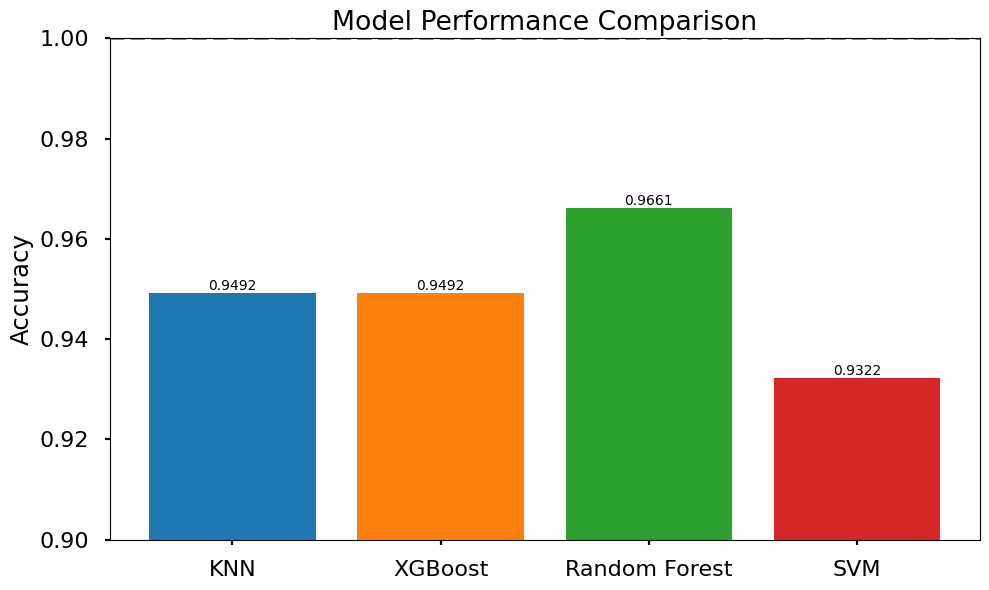

In [4]:
# Model performance data
models = ['KNN', 'XGBoost', 'Random Forest', 'SVM']
accuracies = [0.9491525423728814, 0.9491525423728814, 0.9661016949152542, 0.9322033898305084]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Customize the chart
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_ylim(0.9, 1.0)  # Set y-axis to start from 0.9 for better visibility of differences

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

# Add a horizontal line at y=1 for reference
ax.axhline(y=1, color='r', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, save the figure
# plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')